# 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get data with a previosly made function

In [2]:
from preparation import prepare_data

PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)
df.head(5)

,video_title,channel_name,time
0,Горить Москва,Діти Фрістайла - Topic,2022-07-20 10:30:22.549000+03:00
1,KALUSH - Додому (feat. Skofka),KALUSH,2022-07-20 10:29:13.805000+03:00
2,Russia Does Not Know How To Win,Jake Broe,2022-07-20 10:08:06.631000+03:00
3,The price of supporting Ukraine | Ukraine Repo...,DylanBurnsTV,2022-07-20 10:06:23.015000+03:00
4,"Russias $36,000,000 Mistake - Massive Failure",Speak The Truth,2022-07-20 09:45:58.725000+03:00


# 2. Explore

### 2.1 Count on how many videos you clicked per channel and plot n most watched channels

In [3]:
counts = df["channel_name"].value_counts()
counts

Eurovision Song Contest     195
STERNENKO                   175
Adam Something               79
Beau of the Fifth Column     68
Sky News                     64
                           ... 
10 News First                 1
selfedu                       1
CNA                           1
The Retirement Report         1
АрміяInform                   1
Name: channel_name, Length: 1123, dtype: Int64

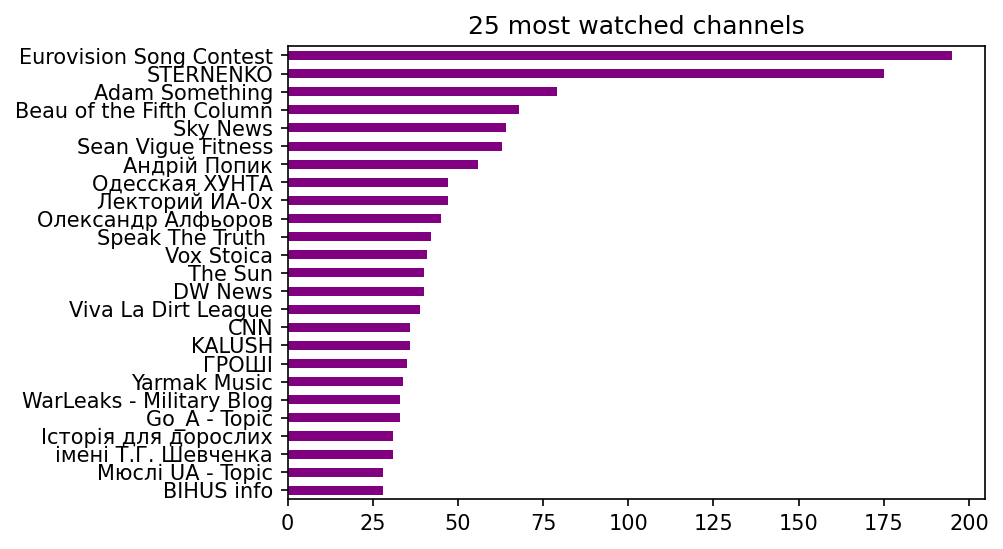

In [4]:
# Plot the most watched n channels
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger

n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()

### 2.2 Count on how many videos you clicked per hour

<AxesSubplot:>

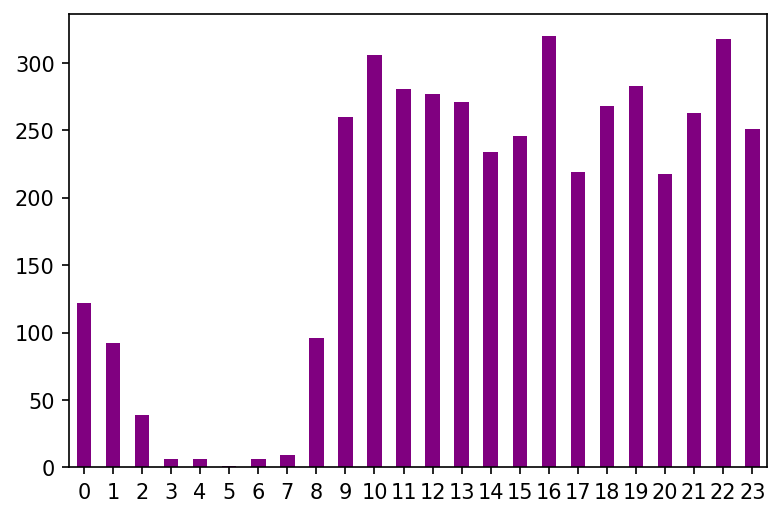

In [5]:
hours = pd.DatetimeIndex(df['time']).hour # get hours from datetime
hours = hours.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
hours.plot.bar(color="purple", rot=0)

### 2.3 Discover at what hours you watch a particular channel 

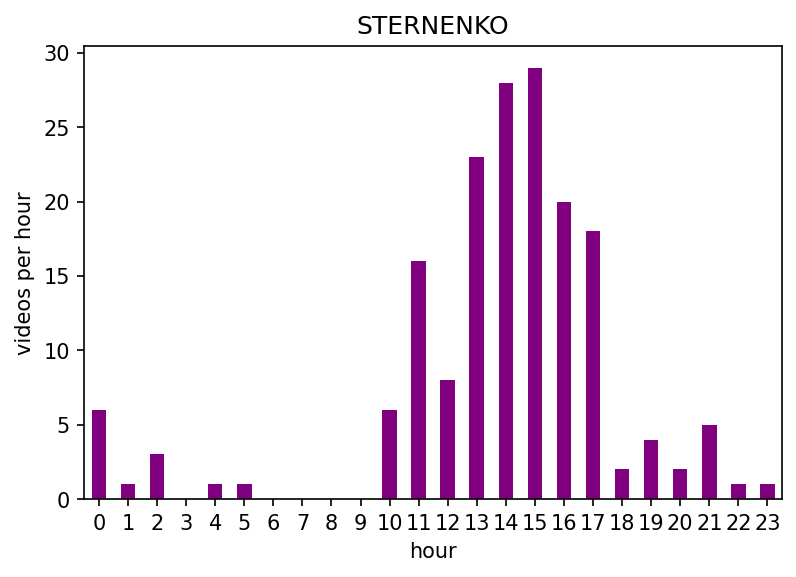

In [11]:
from plotting import one_channel_bar_plot_videos_per_h, get_videos_per_h_series

channel_name_to_look = "STERNENKO"
one_channel_bar_plot_videos_per_h(df, channel_name_to_look)


### 2.4 Plot videos count per hour for several channels

In [50]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

25

['Eurovision Song Contest',
 'STERNENKO',
 'Adam Something',
 'Beau of the Fifth Column',
 'Sky News',
 'Sean Vigue Fitness',
 'Андрій Попик',
 'Одесская ХУНТА',
 'Лекторий ИА-0х',
 'Олександр Алфьоров']

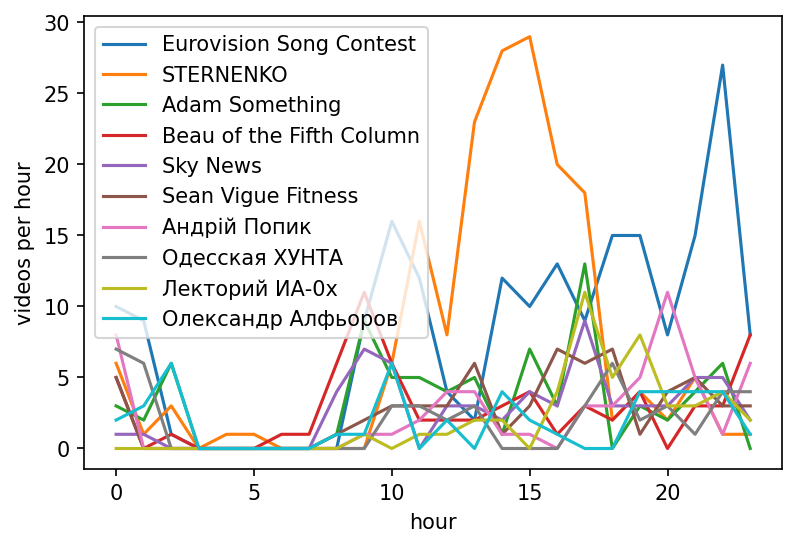

In [59]:
start_point = 0
interval = 10
end_point = start_point + interval

series = get_videos_per_h_series(df, list_top_n_channels[start_point])
ax = series.plot(rot=0,
                 xlabel="hour", ylabel="videos per hour")

for i in range(start_point+1, end_point):
    another_series = get_videos_per_h_series(df, list_top_n_channels[i])
    ax.plot(another_series)
ax.legend(list_top_n_channels[start_point:end_point])
list_top_n_channels[start_point:end_point]


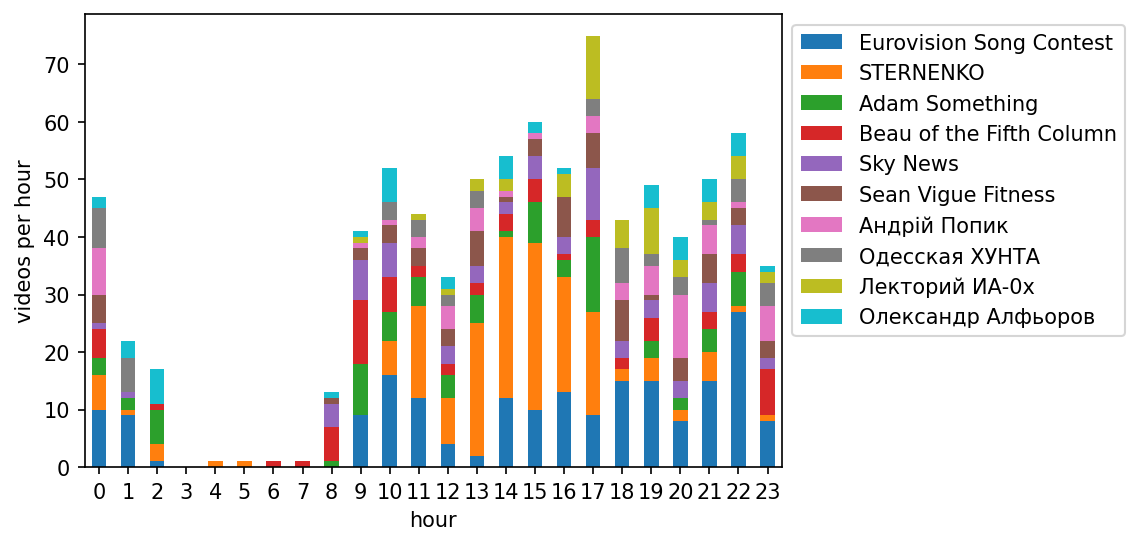

In [61]:
df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))
